# Week 10 Assignment

We had two major areas of discussion this week.  The first was all about how to work with string data - parsing and splitting strings using basic string fuctions as well as more complex string matching using regular expressions.  The second was a basic introduction to Pandas with a few different examples of how to load data into Pandas and then visualize it using graphs (histogram, distribution, scatter, bar, timeseries).

* 36.1 - 1 point
* 36.2 - 1 point
* 38.1 - 3 points

## 36.1 String Manipulation

Write a function that will parse an address that includes one or two parts of street information, a city, a state, and a zip code -- all separated by commas.  You can assume that commas won't appear as part of the address information, only as a delimiter.  Here are some examples:

823 Pebble Street, St. Louis, MO 63105

91 Cityplace, Suite #33, St. Louis, MO 63144

81234 Homeroad, Kansas City, MO 62441


The output you should generate will be a dictionary with the following possible items.

```
{
  'street1': '91 Cityplace',
  'street2': 'Suite #33',
  'city': 'St. Louis',
  'state': 'MO',
  'zip': '63122'
}
```

Declare your function like this:
```
parse_address(address)
```

In [11]:
def parse_address(address):
    all_points = address.split(',')
    if len(all_points)==3:
        street1 = all_points[0].strip()
        street2 = None 
        city = all_points[1].strip()
        state, zip_code = all_points[2].strip().split(' ')
    elif len(all_points)==4:
        street1 = all_points[0].strip()
        street2 = all_points[1].strip()
        city = all_points[2].strip()
        state, zip_code = all_points[3].strip().split(' ')
    return {
        'street1': street1,
        'street2': street2,
        'city': city,
        'state': state,
        'zipcode': zip_code
        }

## 36.2 Test the Address Parser

Now write a series of good tests to ensure that your addres parser is going to work with a variety of different inputs.  Include at least 5 different examples.

In [12]:
a1 = '823 Pebble Street, St. Louis, MO 63105'
a2 = '91 Cityplace, Suite #33, St. Louis, MO 63144'
a3 = '81234 Homeroad, Kansas City, MO 62441'

assert parse_address(a1)['street1'] == '823 Pebble Street'
assert parse_address(a2)['city'] == 'St. Louis'
assert parse_address(a3)['state'] == 'MO'
assert parse_address(a3)['zipcode'] == '62441'
assert parse_address(a1)['street2'] is None

## 38.1 COVID-19 Trend Data

Since we're dealing with a global pandemic right now, probably good to go ahead and do some anlysis with that data.  Take a look at what's here: https://ourworldindata.org/covid-sources-comparison

Near the middle of the page, there are two charts with some data.  On the left is "positive cases" and on the right is "deaths."  Both charts have a button that says "Data."  What you will do below is write a series of Python commands (doesn't need to be in a function) to read that data and produce a simple timeseries chart using the information from John's Hopkins.  Your code will need to read the data, possibly do some reformatting, and then produce a simple timeseries chart.

(Unfortunately, the tools used on this website don't make it easy to link to and directly download the data, so I've placed a copy in `/data/covid19.xlsx` for you to access.  This file came from one of the underlying sources: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

In [20]:
import pandas as pd
data = pd.read_excel('covid19.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateRep                    6012 non-null   datetime64[ns]
 1   Day                        6012 non-null   int64         
 2   Month                      6012 non-null   int64         
 3   Year                       6012 non-null   int64         
 4   Cases                      6012 non-null   int64         
 5   Deaths                     6012 non-null   int64         
 6   Countries and territories  6012 non-null   object        
 7   GeoId                      6005 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 375.9+ KB


One hint that you might find helpful while working on this is that the data in this file is the number of cases each week, not the running total.  You will want to plot a running total.

To do so, pandas has a `.cumsum()` method that you can use after doing a `groupby` and a `.sum()` somewhat similar to the last example of the pandas-viz.ipynb file (except in that example, it's doing a `mean()` instead of `sum()` and a `rolling()` instead of `cumsum()`.)  This link might also provide a little guidance: https://stackoverflow.com/questions/48739374/pandas-plot-cumulative-sum-of-counters-over-time

In [21]:
df.shape

(6012, 8)

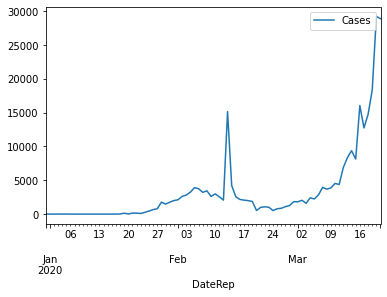

In [31]:
df = pd.DataFrame(data)
df = df.groupby(['DateRep']).sum()[['Cases']]
df.plot()

## Extra Challenges

Take the same data, but not start looking at it by country.  Do some groupbys.

Or take the same data and look at the mortality rate (deaths / total reported cases) and see how that is different by country or trending over time.